# This notebooks opens inTRACKtive directly from the notebook

Dependencies

In [1]:
import pandas as pd
from pathlib import Path
from intracktive.convert import dataframe_to_browser

Load tracks data for C. elegans (or replace by your own data)

In [2]:
df = pd.read_csv("https://public.czbiohub.org/royerlab/zoo/C_elegans/tracks.csv")
df

,track_id,t,z,y,x,parent_track_id
0,0,0,122,112,333,-1
1,0,8,106,140,294,-1
2,0,1,118,115,333,-1
3,0,7,105,122,303,-1
4,0,2,119,116,331,-1
...,...,...,...,...,...,...
110894,1331,374,152,156,244,1000
110895,1331,378,147,160,233,1000
110896,1331,375,151,156,244,1000
110897,1331,377,148,159,235,1000


Open intracktive directly from the data

In [3]:
# Choose the location where the Zarr file will be stored, providing an empty path (Path()) means that the data will be stored in a temporary location
zarr_dir = Path()
# zarr_dir = '/path/on/your/computer/

# dataframe_to_browser(df, zarr_dir)

The `dataframe_to_browser` function sequentially:
1. converts pd.dataFrame to Zarr
2. saves the Zarr in the specified location
3. spins up a localhost at that location
4. launches a browser window of inTRACKtive with as dataUrl the zarr in the localhost, all in a single click

[OPTIONAL] add attributes to color the cells

Takes 20 sec:

In [8]:
df

,track_id,t,z,y,x,parent_track_id
0,0,0,122,112,333,-1
1,0,8,106,140,294,-1
2,0,1,118,115,333,-1
3,0,7,105,122,303,-1
4,0,2,119,116,331,-1
...,...,...,...,...,...,...
110894,1331,374,152,156,244,1000
110895,1331,378,147,160,233,1000
110896,1331,375,151,156,244,1000
110897,1331,377,148,159,235,1000


In [19]:
# df2 = df.copy()
# df2['label'] = -1
# df2

# # Step 1: Update 'label' for rows where 't' == 0
# df2.loc[df2['track_id'] <= 1, 'label'] = df2['track_id']

# # Step 2: Update 'label' for rows where 'label' == 0 based on 'parent_track_id'
# for idx, row in df2.iterrows():
#     if row['label'] == -1:
#         # Find the row where 'track_id' matches 'parent_track_id'
#         parent_row = df2[df2['track_id'] == row['parent_track_id']]
#         if not parent_row.empty:
#             df2.at[idx, 'label'] = parent_row.iloc[0]['label']


<Axes: >

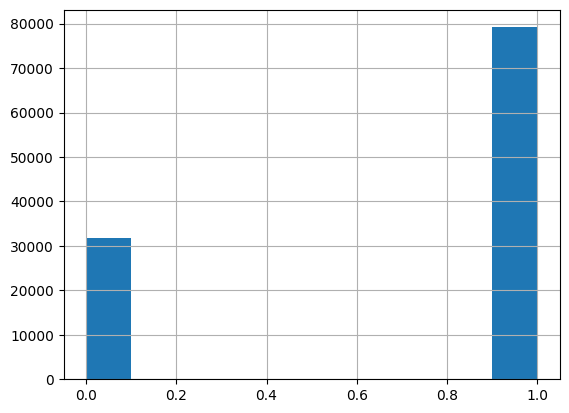

In [20]:
df2.label.hist()

In [ ]:
# Sample DataFrame
df2 = df.copy()
df2['label'] = -1  # Initialize all labels as -1

# Step 1: Assign labels for rows where `t == 0`
df2.loc[df2['t'] == 0, 'label'] = df2.loc[df2['t'] == 0, 'track_id']

# Step 2: Iteratively propagate labels
while df2['label'].min() == -1:  # Continue until all labels are assigned
    # Merge to propagate labels from parent to children
    df2 = df2.merge(
        df2[['track_id', 'label']].rename(columns={'track_id': 'parent_track_id', 'label': 'parent_label'}),
        how='left',
        on='parent_track_id'
    )
    # Update labels where not yet assigned
    df2['label'] = df2['label'].where(df2['label'] != -1, df2['parent_label'])
    # Drop the temporary column used for merging
    df2.drop(columns=['parent_label'], inplace=True)


In [7]:
dataframe_to_browser(df2, zarr_dir, extra_cols = ['label'])

TypeError: dataframe_to_browser() got an unexpected keyword argument 'extra_cols'